In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as data

plt.style.use('fivethirtyeight')
%matplotlib inline

In [150]:
import yfinance as yf
import datetime as dt

stock = "IBM"
start = dt.datetime(1963, 1, 1)
end = dt.datetime(2024, 11, 1)

df = yf.download(stock, start, end)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_136784\2802849642.py:8: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


In [151]:
df.head()

Price          Close      High       Low      Open   Volume
Ticker           IBM       IBM       IBM       IBM      IBM
Date                                                       
1963-01-02  0.997343  1.010952  0.996047  1.010952  2502555
1963-01-03  1.027801  1.027801  0.999287  0.999287  1176750
1963-01-04  1.029098  1.038818  1.029098  1.029098  1608225
1963-01-07  1.020673  1.038818  1.018729  1.029098   925710
1963-01-08  1.045947  1.045947  1.029098  1.029098  1890645

In [152]:
df.shape

(15565, 5)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15565 entries, 1963-01-02 to 2024-10-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (Close, IBM)   15565 non-null  float64
 1   (High, IBM)    15565 non-null  float64
 2   (Low, IBM)     15565 non-null  float64
 3   (Open, IBM)    15565 non-null  float64
 4   (Volume, IBM)  15565 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 729.6 KB


In [154]:
df.isnull().sum()

Price   Ticker
Close   IBM       0
High    IBM       0
Low     IBM       0
Open    IBM       0
Volume  IBM       0
dtype: int64

In [155]:
df.describe()

Price          Close          High           Low          Open        Volume
Ticker           IBM           IBM           IBM           IBM           IBM
count   15565.000000  15565.000000  15565.000000  15565.000000  1.556500e+04
mean       39.479046     39.821098     39.125219     39.463953  5.134609e+06
std        44.179037     44.508268     43.823730     44.157032  4.605370e+06
min         0.997343      1.010952      0.996047      0.999287  0.000000e+00
25%         4.095063      4.127926      4.067322      4.093929  1.624647e+06
50%        11.788245     11.906729     11.709317     11.803797  4.351360e+06
75%        66.489662     67.217501     65.858066     66.453564  7.070960e+06
max       230.342758    232.408665    228.296445    231.458938  7.263916e+07

In [156]:
df = df.reset_index()

In [157]:
df.columns

MultiIndex([(  'Date',    ''),
            ( 'Close', 'IBM'),
            (  'High', 'IBM'),
            (   'Low', 'IBM'),
            (  'Open', 'IBM'),
            ('Volume', 'IBM')],
           names=['Price', 'Ticker'])

In [158]:
df.to_csv("ibm.csv")

In [159]:
data01 = pd.read_csv("ibm.csv")

In [160]:
data01.head()

Price        Date               Close                High  \
0  Ticker         NaN                 IBM                 IBM   
1       0  1963-01-02  0.9973433017730713   1.010952198336976   
2       1  1963-01-03  1.0278010368347168  1.0278010368347168   
3       2  1963-01-04  1.0290977954864502  1.0388184667784708   
4       3  1963-01-07   1.020673155784607   1.038818420992379   

                  Low                Open   Volume  
0                 IBM                 IBM      IBM  
1  0.9960471286529542   1.010952198336976  2502555  
2  0.9992869858915647  0.9992869858915647  1176750  
3  1.0290977954864502  1.0290977954864502  1608225  
4  1.0187290410055243  1.0290977501287988   925710

In [161]:
# Candlesticks 
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x = data01['Date'], open = data01['Open'], 
                                    high = data01['High'],
                                    low = data01['Low'], 
                                    close = data01['Close'])])
fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()

In [162]:
df = df.drop(columns=[col for col in ['Date', 'Adj Close'] if col in df.columns])

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_136784\1238625666.py:1: PerformanceWarning:

dropping on a non-lexsorted multi-index without a level parameter may impact performance.



In [163]:
df.head()

Price      Close      High       Low      Open   Volume
Ticker       IBM       IBM       IBM       IBM      IBM
0       0.997343  1.010952  0.996047  1.010952  2502555
1       1.027801  1.027801  0.999287  0.999287  1176750
2       1.029098  1.038818  1.029098  1.029098  1608225
3       1.020673  1.038818  1.018729  1.029098   925710
4       1.045947  1.045947  1.029098  1.029098  1890645

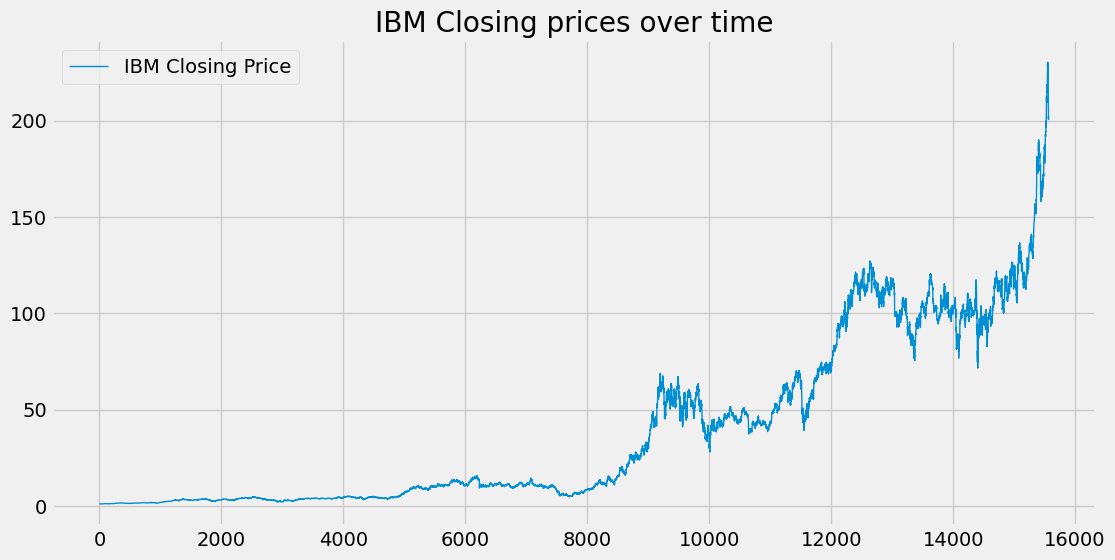

In [164]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label = f'{stock} Closing Price', linewidth = 1)
plt.title(f'{stock} Closing prices over time')
plt.legend()
plt.show()

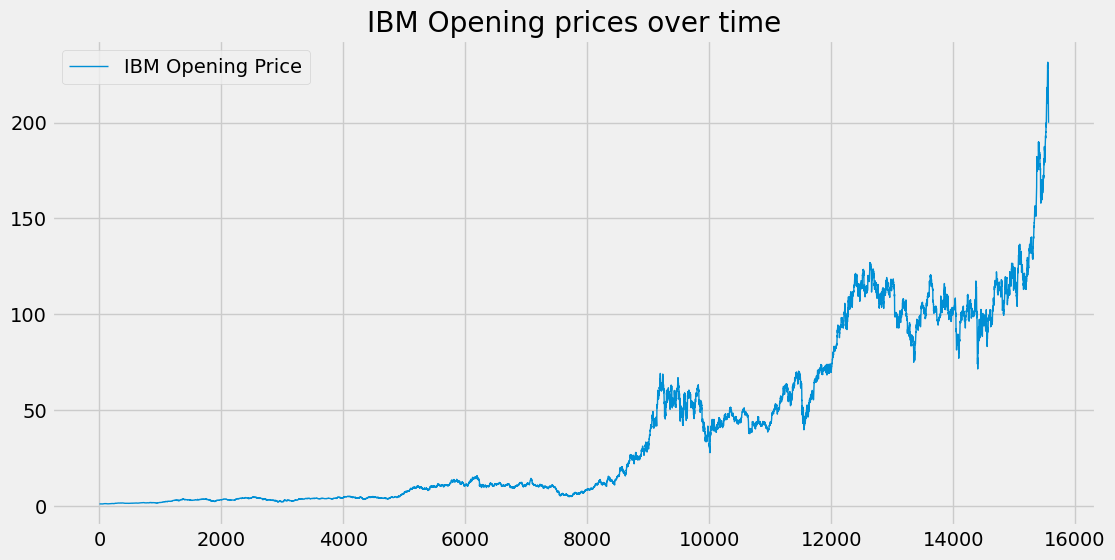

In [165]:
plt.figure(figsize=(12, 6))
plt.plot(df['Open'], label = f'{stock} Opening Price', linewidth = 1)
plt.title(f'{stock} Opening prices over time')
plt.legend()
plt.show()

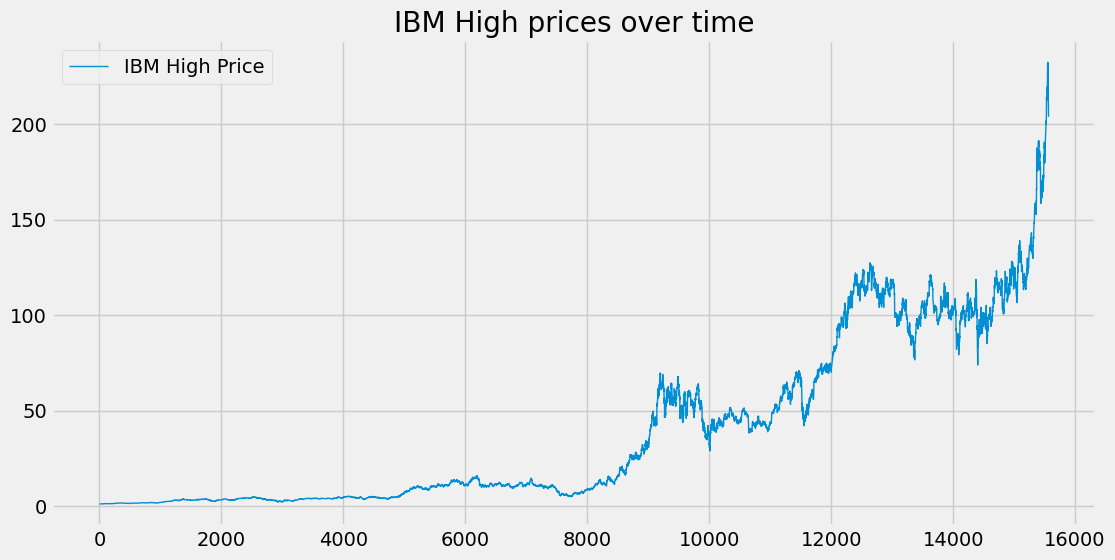

In [166]:
plt.figure(figsize=(12, 6))
plt.plot(df['High'], label = f'{stock} High Price', linewidth = 1)
plt.title(f'{stock} High prices over time')
plt.legend()
plt.show()

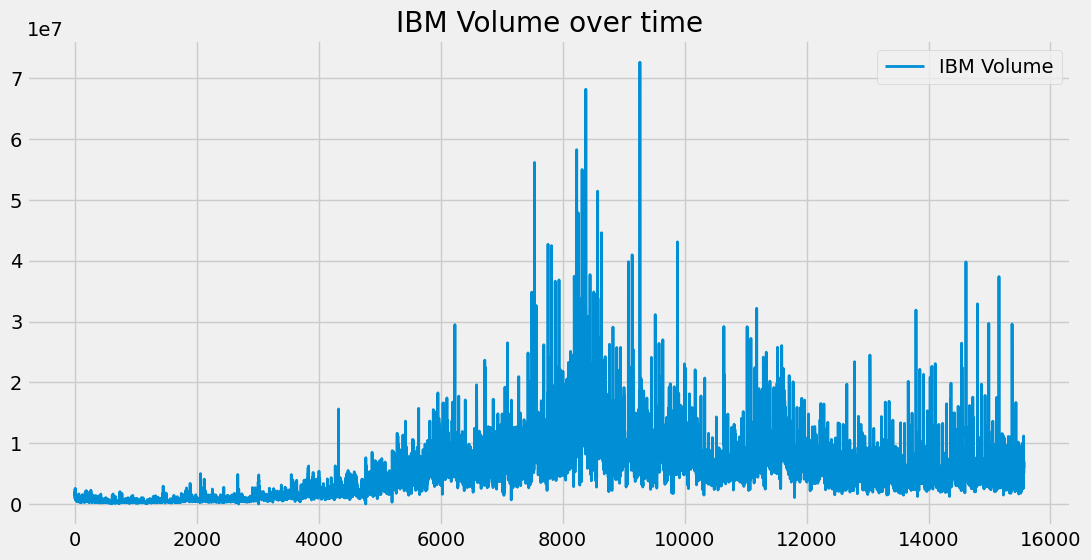

In [167]:
plt.figure(figsize=(12, 6))
plt.plot(df['Volume'], label = f'{stock} Volume', linewidth = 2)
plt.title(f'{stock} Volume over time')
plt.legend()
plt.show()

In [168]:
# Moving Average
# [10, 20, 30, 40, 50, 60, 70, 80, 90]
# moving average for last 5 days -> null null null null 30.0 40.0 50.0

temp_data = [10, 20, 30, 40, 50, 60, 70, 80, 90]
print(sum(temp_data[2:7])/5)

50.0


In [169]:
import pandas as pd
df01 = pd.DataFrame(temp_data)

In [170]:
df01.rolling(5).mean()

0
0   NaN
1   NaN
2   NaN
3   NaN
4  30.0
5  40.0
6  50.0
7  60.0
8  70.0

In [171]:
ma100 = df.Close.rolling(100).mean()

In [172]:
ma100

Ticker         IBM
0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
...            ...
15560   193.098734
15561   193.558727
15562   193.986479
15563   194.342519
15564   194.712787

[15565 rows x 1 columns]

In [173]:
ma200 = df.Close.rolling(200).mean()

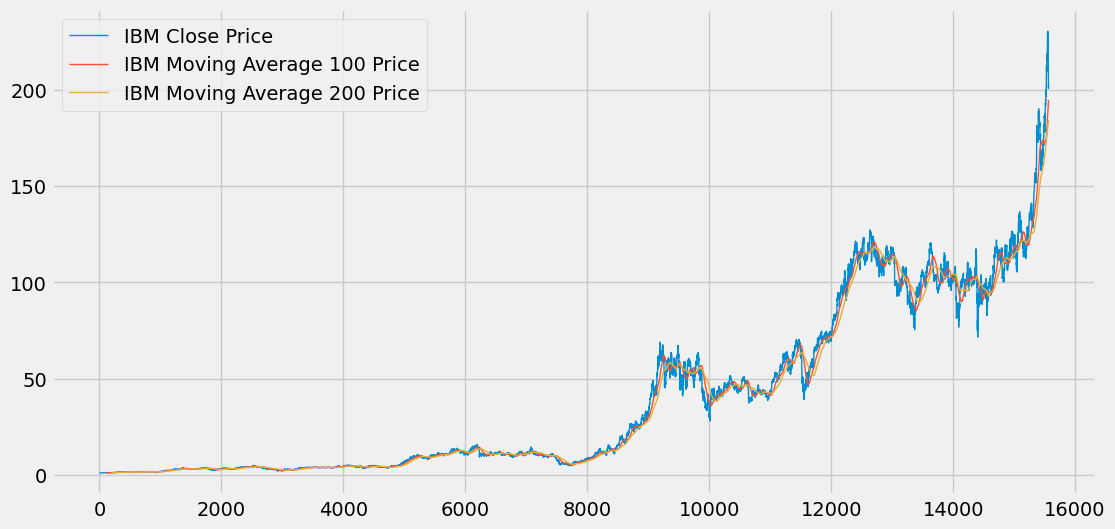

In [174]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ma100, label = f'{stock} Moving Average 100 Price', linewidth = 1)
plt.plot(ma200, label = f'{stock} Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [175]:
ema100 = df.Close.ewm(span=100, adjust = False).mean()

In [176]:
ema200 = df['Close'].ewm(span=200, adjust = False).mean()

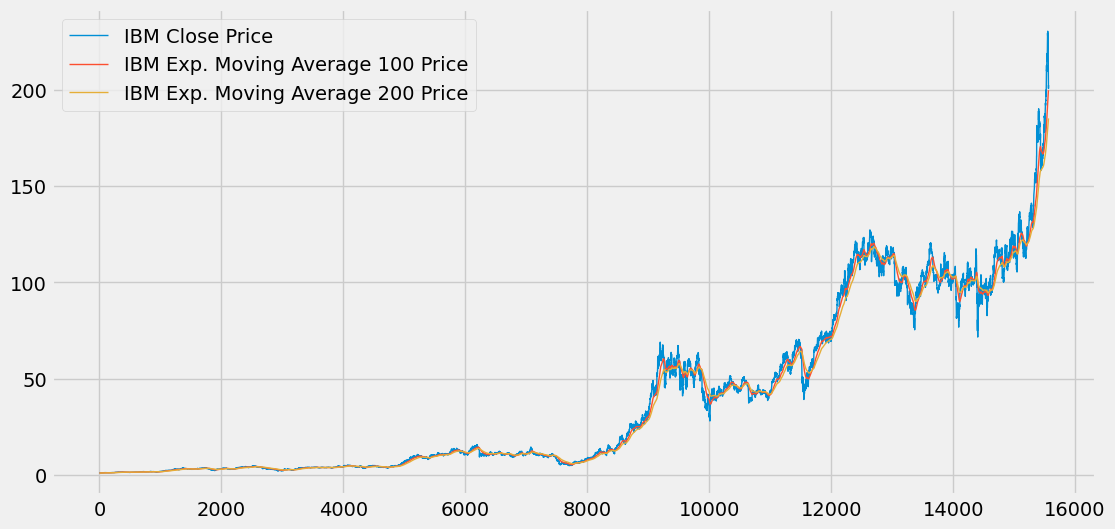

In [177]:
plt.figure(figsize=(12, 6))
plt.plot(df.Close, label = f'{stock} Close Price', linewidth = 1)
plt.plot(ema100, label = f'{stock} Exp. Moving Average 100 Price', linewidth = 1)
plt.plot(ema200, label = f'{stock} Exp. Moving Average 200 Price', linewidth = 1)
plt.legend()
plt.show()

In [178]:
# Training & Testing

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

In [179]:
data_training.shape

(10895, 1)

In [180]:
data_testing.shape

(4670, 1)

In [181]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0, 1))

In [182]:
data_training_array = scaler.fit_transform(data_training)

In [183]:
data_training_array

array([[0.00000000e+00],
       [4.48406932e-04],
       [4.67498160e-04],
       ...,
       [6.18176392e-01],
       [6.10930557e-01],
       [6.07770097e-01]], shape=(10895, 1))

In [184]:
data_training_array.shape[0]

10895

In [185]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train  = np.array(x_train), np.array(y_train)

In [186]:
x_train.shape

(10795, 100, 1)

In [187]:
%pip install tensorflow

# Model Building
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

Note: you may need to restart the kernel to use updated packages.


LSTM Input -> 3D Array (batch_size, time_steps, seq_len)
LSTM 2D OR 3D
2D -> (batch_sizem units)
3D -> (batch_size, time_steps, units)

In [188]:
model = Sequential()

model.add(LSTM(units = 50, activation = 'relu', return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\LENOVO\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning:

Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.



In [189]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_8 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_9 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 5)

Epoch 1/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 84s 232ms/step - loss: 0.0066
Epoch 2/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 77s 228ms/step - loss: 0.0028
Epoch 3/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 88s 261ms/step - loss: 0.0024
Epoch 4/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 81s 240ms/step - loss: 0.0022
Epoch 5/5
338/338 ━━━━━━━━━━━━━━━━━━━━ 90s 266ms/step - loss: 0.0023


In [191]:
past_100_days = data_training.tail(100)

In [192]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [193]:
print(final_df.head())

Ticker        IBM
0       45.380592
1       45.840187
2       45.589508
3       45.955097
4       46.378128


In [194]:
input_data = scaler.fit_transform(final_df)

In [195]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

x_test, y_test  = np.array(x_test), np.array(y_test)

In [196]:
x_test.shape

(4670, 100, 1)

In [197]:
y_predicted = model.predict(x_test)

146/146 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step


In [198]:
y_predicted.shape

(4670, 1)

In [199]:
scaler.scale_

array([0.00521694])

In [200]:
scaler_factor = 1 / 0.0035166
y_predicted = y_predicted * scaler_factor
y_test = y_test * scaler_factor

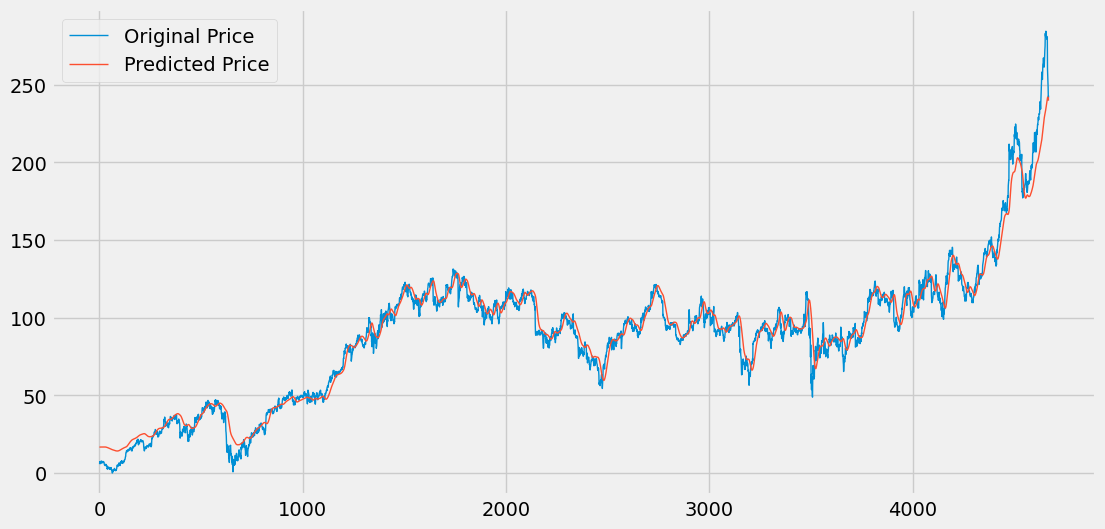

In [201]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, label = 'Original Price', linewidth = 1)
plt.plot(y_predicted, label = 'Predicted Price', linewidth = 1)
plt.legend()
plt.show()

In [202]:
model.save('stock_dl_model.h5')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_136784\2662501775.py:18: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


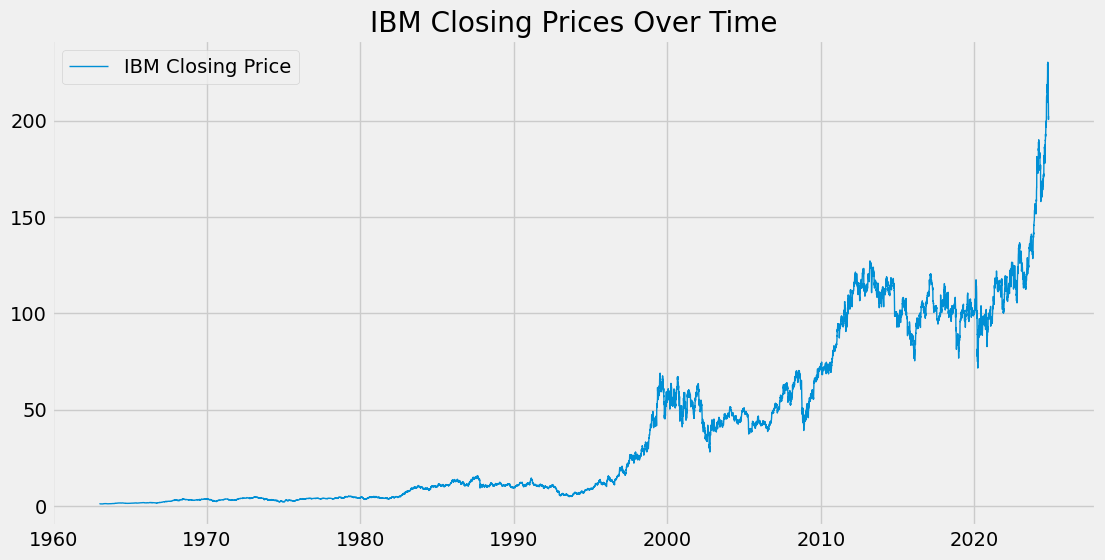

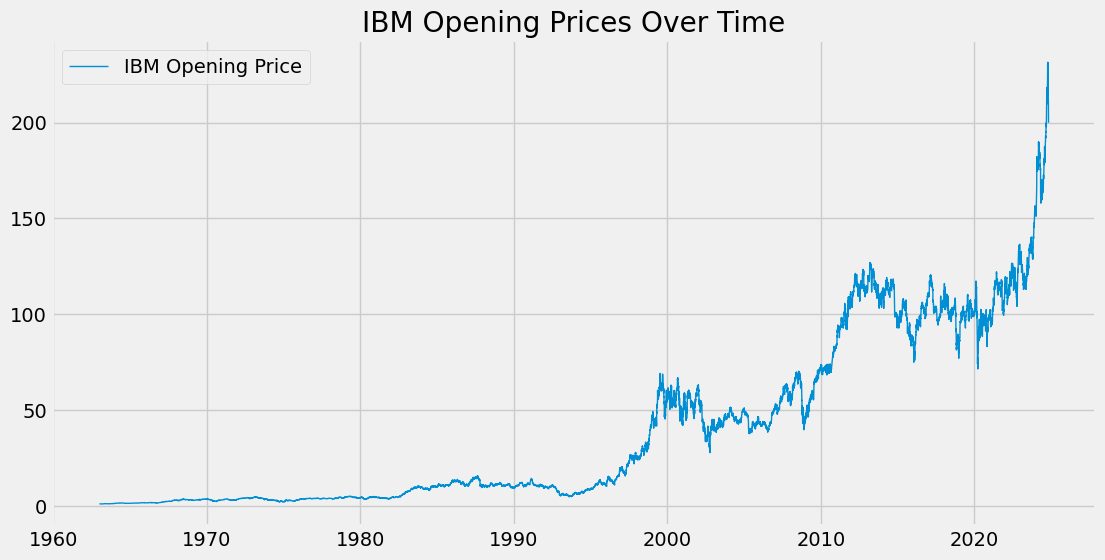

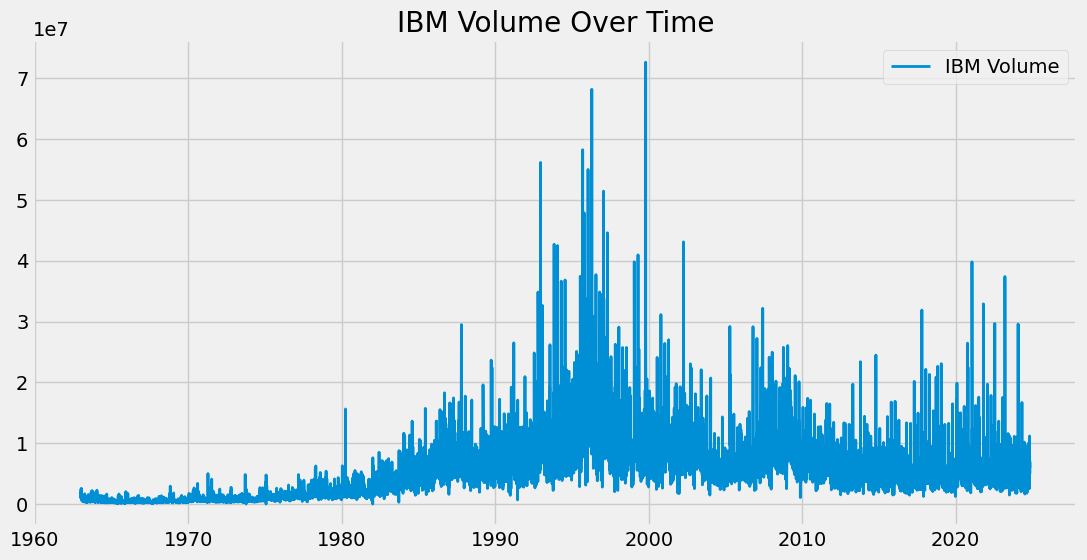

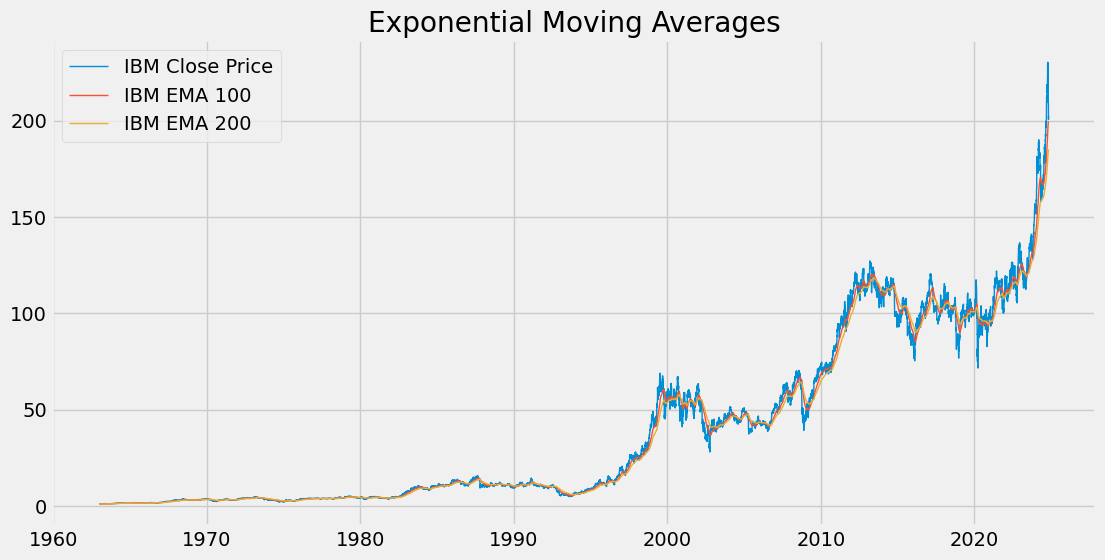

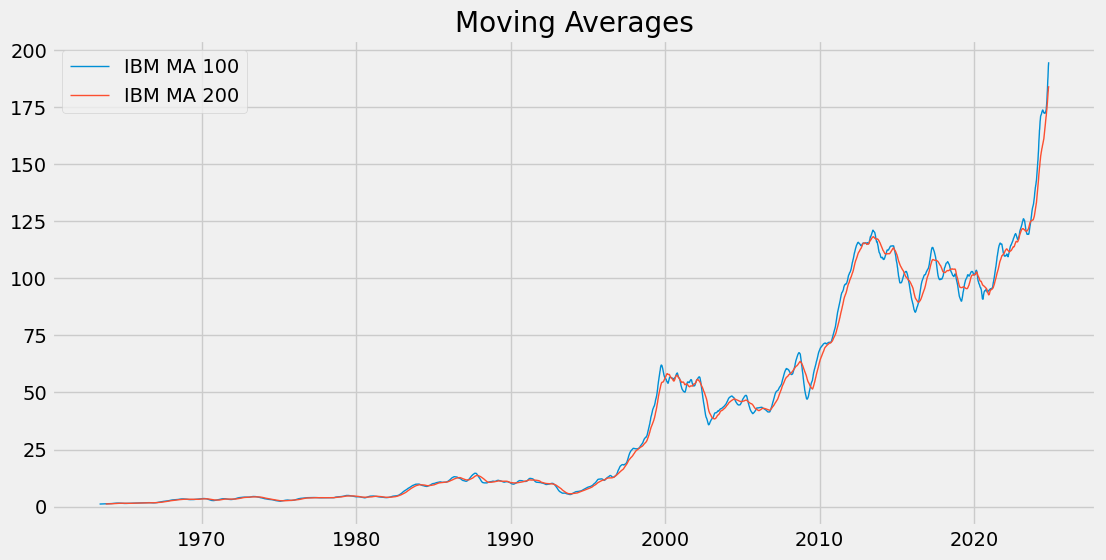

Mean Squared Error: 2551.05


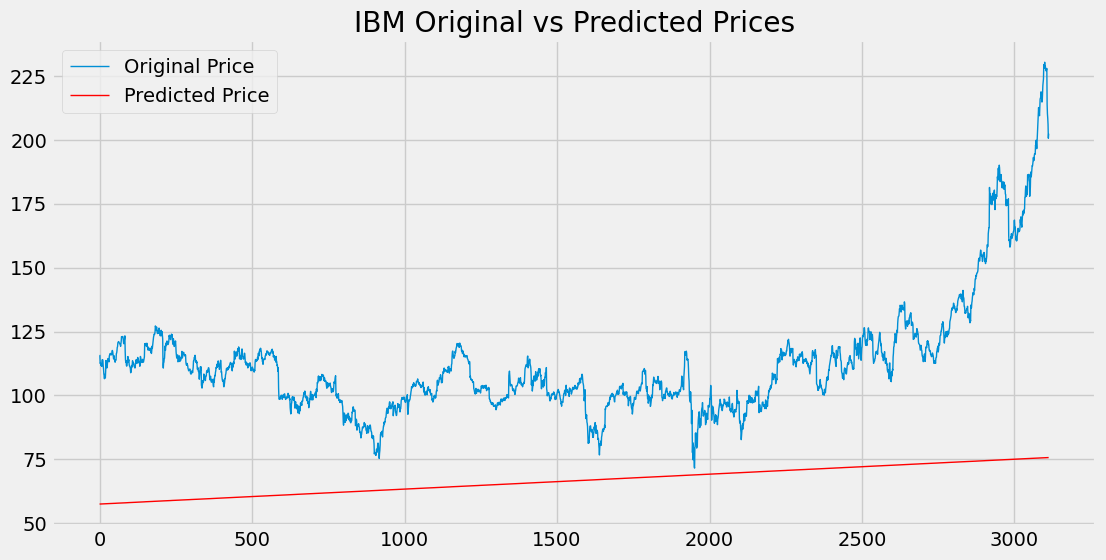

In [206]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import plotly.graph_objects as go

# Set plot style
plt.style.use('fivethirtyeight')

# ----- 1. Load Stock Data -----
stock = "IBM"  # You can change to any stock symbol, e.g., 'AAPL', 'RELIANCE.NS'
start = dt.datetime(1963, 1, 1)
end = dt.datetime(2024, 11, 1)
df = yf.download(stock, start, end)
df.reset_index(inplace=True)

# ----- 2. Plot Candlestick Chart -----
fig = go.Figure(data=[go.Candlestick(x=df['Date'], open=df['Open'],
                                     high=df['High'], low=df['Low'], close=df['Close'])])
fig.update_layout(title=f"{stock} Candlestick Chart", xaxis_rangeslider_visible=False)
fig.show()

# ----- 3. Basic Price Charts -----
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label=f'{stock} Closing Price', linewidth=1)
plt.title(f'{stock} Closing Prices Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Open'], label=f'{stock} Opening Price', linewidth=1)
plt.title(f'{stock} Opening Prices Over Time')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Volume'], label=f'{stock} Volume', linewidth=2)
plt.title(f'{stock} Volume Over Time')
plt.legend()
plt.show()

# ----- 4. Moving Averages -----
df['MA100'] = df['Close'].rolling(window=100).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()
df['EMA100'] = df['Close'].ewm(span=100, adjust=False).mean()
df['EMA200'] = df['Close'].ewm(span=200, adjust=False).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label=f'{stock} Close Price', linewidth=1)
plt.plot(df['Date'], df['EMA100'], label=f'{stock} EMA 100', linewidth=1)
plt.plot(df['Date'], df['EMA200'], label=f'{stock} EMA 200', linewidth=1)
plt.title('Exponential Moving Averages')
plt.legend()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['MA100'], label=f'{stock} MA 100', linewidth=1)
plt.plot(df['Date'], df['MA200'], label=f'{stock} MA 200', linewidth=1)
plt.title('Moving Averages')
plt.legend()
plt.show()

# ----- 5. Stock Price Prediction (Linear Regression) -----
# Prepare Data
df['Date_ordinal'] = df['Date'].map(pd.Timestamp.toordinal)
X = df[['Date_ordinal']]
y = df['Close']

# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_predicted = model.predict(X_test)
mse = mean_squared_error(y_test, y_predicted)
print(f'Mean Squared Error: {mse:.2f}')

# Plot Original vs Predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Original Price', linewidth=1)
plt.plot(y_predicted, label='Predicted Price', linewidth=1, color='red')
plt.title(f'{stock} Original vs Predicted Prices')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_136784\3399242175.py:10: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


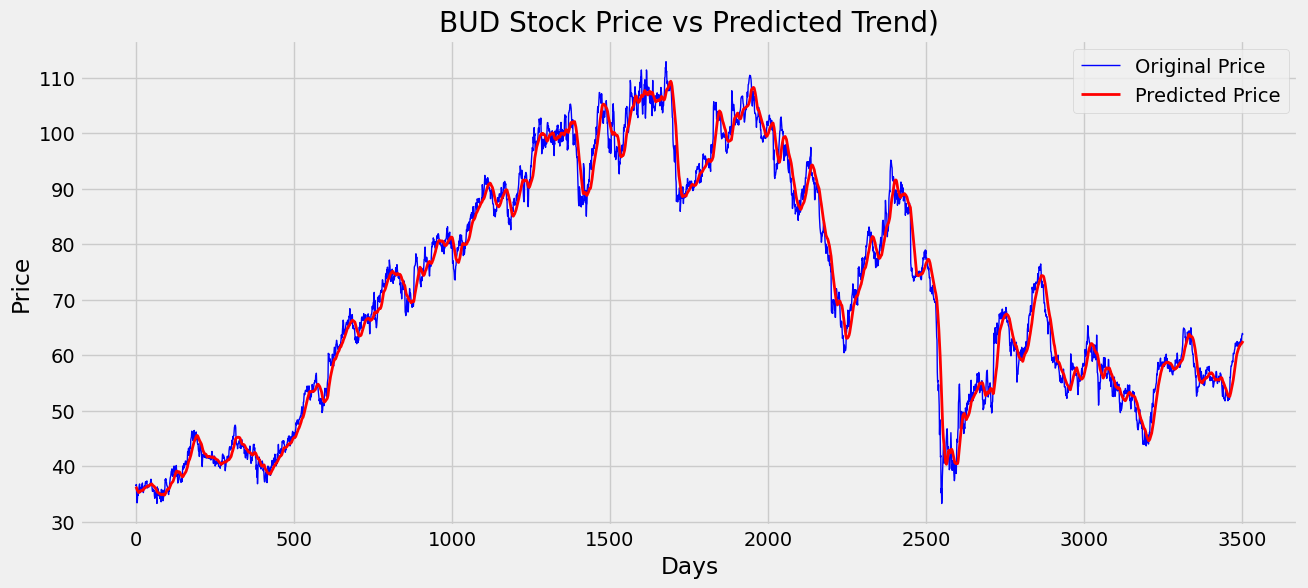

In [204]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# 1. Fetch historical stock data
stock = 'BUD'  # Change to your preferred stock
start_date = '2010-01-01'
end_date = '2024-01-01'

df = yf.download(stock, start=start_date, end=end_date)
df.reset_index(inplace=True)

# 2. Calculate a moving average as a "prediction"
df['Predicted'] = df['Close'].rolling(window=20).mean()

# 3. Drop NaN values for clean plotting
df.dropna(inplace=True)

# 4. Plot actual vs predicted prices
plt.figure(figsize=(14, 6))
plt.plot(df['Close'].values, label='Original Price', linewidth=1, color='blue')
plt.plot(df['Predicted'].values, label='Predicted Price', linewidth=2, color='red')
plt.title(f'{stock} Stock Price vs Predicted Trend)')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd
import yfinance as yf

# Download 10 years of stock data for TATA Motors
df = yf.download("TATAMOTORS.NS", start="2000-01-01", end="2024-01-01")
df.reset_index(inplace=True)
df = df[['Price', 'Date', 'Close', 'High', 'Low', 'Open','Volume']]


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_136784\3284350824.py:5: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed
